**PROBLEM NUMBER - 1**

# **KEY DRIVER ANALYSIS ON IMDb  MOVIE REVIEWS DATASET**

NAME : YUVASHREE M

REG.NO: 20MIC0150

EMAIL : yuvamagesh28@gmail.com

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import string
import emoji
# Download NLTK resources

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load IMDb movie review dataset
df = pd.read_csv('/content/IMDB Dataset.csv')
print(df.head(10))


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive


#**Data preprocessing**

In [ ]:
def preprocess_text(text):
    # Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, "html.parser").get_text()
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Replace emojis with text
    text = emoji.demojize(text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization using NLTK
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization using NLTK
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    text = ' '.join(tokens)

    return text

df['clean_review'] = df['review'].apply(preprocess_text)
print(df[['clean_review']].head())

<ipython-input-84-c8d6371bff81>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


                                        clean_review
0  one reviewer mentioned watching oz episode you...
1  wonderful little production filming technique ...
2  thought wonderful way spend time hot summer we...
3  basically there family little boy jake think t...
4  petter matteis love time money visually stunni...


# **Keyword Extraction:**

* TF-IDF (Term Frequency-Inverse Document Frequency) : Compute TF-IDF scores for each term in the movie reviews to identify terms that are statistically significant within individual reviews.

* TextRank algorithm : Apply for the graph to rank words based on their importance within the entire dataset, considering the relationships between words.









In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_review'])

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Function to extract keywords using TF-IDF
def extract_keywords_tfidf(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token in tfidf_feature_names]
    return tokens

# Function to preprocess text and extract keywords using NLTK TextRank
def extract_keywords_textrank(text):

    sentences = sent_tokenize(text)

    words = [word for word in word_tokenize(text) if word.lower() not in stopwords.words('english') and word.isalnum()]
    freq_dist = FreqDist(words)

    # Sort words by frequency
    sorted_words = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

    # Select top keywords based on frequency
    top_keywords = [word for word, freq in sorted_words[:10]]  # Adjust number of top keywords as needed

    return top_keywords

# Extract keywords using both methods and compare
for i, clean_review in enumerate(df['clean_review'][:5]):  # Process the first 5 reviews as an example
    print(f"Review {i + 1}:")
    print("Keywords by TF-IDF:", extract_keywords_tfidf(clean_review))
    print("Keywords by TextRank:", extract_keywords_textrank(clean_review))
    print("=" * 50)

Review 1:
Keywords by TF-IDF: ['one', 'mentioned', 'watching', 'episode', 'youll', 'right', 'exactly', 'happened', 'first', 'thing', 'scene', 'violence', 'set', 'right', 'word', 'go', 'show', 'show', 'pull', 'drug', 'sex', 'violence', 'classic', 'use', 'called', 'given', 'state', 'focus', 'city', 'front', 'face', 'high', 'city', 'home', 'italian', 'death', 'never', 'far', 'would', 'say', 'main', 'show', 'due', 'fact', 'go', 'show', 'wouldnt', 'forget', 'pretty', 'picture', 'audience', 'forget', 'forget', 'doesnt', 'mess', 'around', 'first', 'episode', 'ever', 'saw', 'couldnt', 'say', 'watched', 'taste', 'got', 'high', 'level', 'violence', 'violence', 'kill', 'order', 'get', 'away', 'well', 'middle', 'class', 'turned', 'due', 'lack', 'street', 'experience', 'watching', 'may', 'become', 'get', 'touch', 'side']
Keywords by TextRank: ['oz', 'violence', 'show', 'prison', 'forget', 'watching', 'episode', 'right', 'first', 'struck']
Review 2:
Keywords by TF-IDF: ['wonderful', 'little', 'produ

 **Scores from both TF-IDF and TextRank algorithms were combined to generate a comprehensive list of keywords.**

In [ ]:
from collections import Counter
# Extract keywords using both methods and compute combined score
def compute_combined_keywords(df):
    tfidf_keywords = {}
    textrank_keywords = {}

    # Extract TF-IDF keywords and their scores
    for text in df['clean_review']:
        for word in extract_keywords_tfidf(text):
            if word in tfidf_keywords:
                tfidf_keywords[word] += 1
            else:
                tfidf_keywords[word] = 1

    # Normalize TF-IDF scores
    max_tfidf_score = max(tfidf_keywords.values())
    tfidf_keywords = {word: score / max_tfidf_score for word, score in tfidf_keywords.items()}

    # Extract TextRank keywords and their scores
    for text in df['clean_review']:
        for word in extract_keywords_textrank(text):
            if word in textrank_keywords:
                textrank_keywords[word] += 1
            else:
                textrank_keywords[word] = 1

    # Normalize TextRank scores
    max_textrank_score = max(textrank_keywords.values())
    textrank_keywords = {word: score / max_textrank_score for word, score in textrank_keywords.items()}

    # Combine scores from both methods
    combined_keywords = Counter(tfidf_keywords) + Counter(textrank_keywords)
    return combined_keywords

combined_keywords = compute_combined_keywords(df)

# Convert combined scores to DataFrame for analysis
combined_keywords_df = pd.DataFrame.from_dict(combined_keywords, orient='index', columns=['combined_score'])
combined_keywords_df = combined_keywords_df.sort_values(by='combined_score', ascending=False)

# Display top keywords
print(combined_keywords_df.head(20))


           combined_score
movie            2.000000
film             1.752934
one              1.026722
like             0.721419
good             0.510146
time             0.504953
character        0.469075
story            0.431038
really           0.404482
would            0.395897
get              0.394622
even             0.388789
see              0.384974
make             0.366798
scene            0.333474
bad              0.314272
great            0.313246
much             0.293704
people           0.293476
well             0.291267


In [ ]:

print("Top Keywords using TF-IDF:")
print(extract_keywords_tfidf(clean_review))
print("\nTop Keywords using TextRank:")
print(top_keywords)
print("\nTop  Keywords (Combined):")
print( combined_keywords_df.head(10))

Top Keywords using TF-IDF:
['love', 'time', 'money', 'film', 'watch', 'mr', 'offer', 'human', 'movie', 'seems', 'telling', 'money', 'power', 'success', 'people', 'different', 'situation', 'play', 'theme', 'director', 'action', 'present', 'time', 'new', 'york', 'different', 'character', 'meet', 'one', 'one', 'way', 'another', 'next', 'person', 'one', 'seems', 'know', 'previous', 'point', 'film', 'look', 'taken', 'see', 'people', 'live', 'world', 'live', 'thing', 'one', 'get', 'soul', 'picture', 'different', 'stage', 'one', 'big', 'city', 'exactly', 'best', 'place', 'human', 'find', 'one', 'case', 'people', 'acting', 'good', 'mr', 'direction', 'michael', 'rest', 'talented', 'cast', 'make', 'character', 'come', 'wish', 'mr', 'good', 'next', 'work']

Top Keywords using TextRank:
['movie', 'film', 'one', 'like', 'good', 'time', 'character', 'story', 'really', 'see']

Top  Keywords (Combined):
           combined_score
movie            2.000000
film             1.752934
one              1.02

**Sentiment Analysis:**

* SVM (Support Vector Machine) classifier was trained on a portion of the dataset to predict sentiment based on TF-IDF features.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_review'], df['sentiment'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# SVM Classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_tfidf, y_train)

# Predictions
y_pred = svm_clf.predict(X_test_tfidf)
print(y_pred)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
#Confusion matrix

confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix_result)

# Classification Report
print("Classification  Report : ",classification_report(y_test, y_pred))


['negative' 'positive' 'negative' ... 'positive' 'negative' 'positive']
Accuracy: 0.86
Confusion Matrix:
 [[4186  775]
 [ 631 4408]]
Classification  Report :                precision    recall  f1-score   support

    negative       0.87      0.84      0.86      4961
    positive       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



**VADER sentiment analysis library was used to classify sentiment positive, negative, or neutral for each review.**

In [ ]:
# Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment using VADER
def analyze_sentiment_vader(text):
    sentiment_scores = analyzer.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Analyze sentiment for each review in test set using VADER
y_pred_vader = X_test.apply(analyze_sentiment_vader)
# Perform sentiment analysis on the first review as an example
review_text = df['clean_review'][0]

sentiment, compound_score = analyze_sentiment(review_text)
print("Sentiment Analysis using VADER:")
print("Sentiment:", sentiment)
print("Compound Score:", compound_score)

# Apply VADER sentiment analysis to each review
df['predicted_sentiment'] = df['review'].apply(analyze_sentiment_vader)

# Accuracy calculation
accuracy = accuracy_score(df['sentiment'], df['predicted_sentiment'])
print(f"Accuracy of VADER sentiment analysis: {accuracy:.2f}")

Sentiment Analysis using VADER:
Sentiment: negative
Compound Score: -0.9929
Accuracy of VADER sentiment analysis: 0.69


In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['clean_review'])

# Get feature names (keywords)
feature_names = vectorizer.get_feature_names_out()

# Calculate top keywords based on TF-IDF weights
tfidf_scores = X_tfidf.sum(axis=0).A1
top_keyword_indices = tfidf_scores.argsort()[::-1][:10]
# Top  keywords
top_keywords = [feature_names[idx] for idx in top_keyword_indices]

# Print top keywords
print("Top Keywords:")
for idx, keyword in enumerate(top_keywords, start=1):
    print(f"{idx}. {keyword}")
keyword_sentiments = {keyword: [] for keyword in top_keywords}

for review, sentiment in zip(X_test, y_pred):
    for keyword in top_keywords:
        if keyword in review:
            keyword_sentiments[keyword].append(sentiment)

# Calculate importance based on sentiment distribution
keyword_importance = {}
keyword_importance_score = []
for keyword, sentiments in keyword_sentiments.items():
    sentiment_counts = Counter(sentiments)
    total_mentions = len(sentiments)
    importance_score = sentiment_counts['positive'] / total_mentions
    keyword_importance[keyword] = importance_score
    keyword_importance_score.append(( importance_score))
print("Importance Score")
print(keyword_importance_score)
print(keyword_importance)


Top Keywords:
1. movie
2. film
3. one
4. like
5. good
6. time
7. character
8. story
9. really
10. see
Importance Score
[0.47443794271635353, 0.5251822398939695, 0.516301512780386, 0.48842592592592593, 0.5178075271533216, 0.5272808586762076, 0.5222779580997344, 0.5620253164556962, 0.47505781301618766, 0.5200469719845664]
{'movie': 0.47443794271635353, 'film': 0.5251822398939695, 'one': 0.516301512780386, 'like': 0.48842592592592593, 'good': 0.5178075271533216, 'time': 0.5272808586762076, 'character': 0.5222779580997344, 'story': 0.5620253164556962, 'really': 0.47505781301618766, 'see': 0.5200469719845664}


In [ ]:
# Print actionable insights
print("\nActionable Insights:")
for idx, (keyword, importance) in enumerate(sorted_keywords, start=1):
    print(f"{idx}. Keyword: {keyword}, Importance Score: {importance:.2f}")


Actionable Insights:
1. Keyword: good, Importance Score: 0.74
2. Keyword: story, Importance Score: 0.72
3. Keyword: character, Importance Score: 0.71
4. Keyword: like, Importance Score: 0.70
5. Keyword: time, Importance Score: 0.70
6. Keyword: see, Importance Score: 0.70
7. Keyword: film, Importance Score: 0.69
8. Keyword: one, Importance Score: 0.69
9. Keyword: really, Importance Score: 0.68
10. Keyword: movie, Importance Score: 0.68


**Visual Representation**

Plotting the relationship between polarity and factor importance.






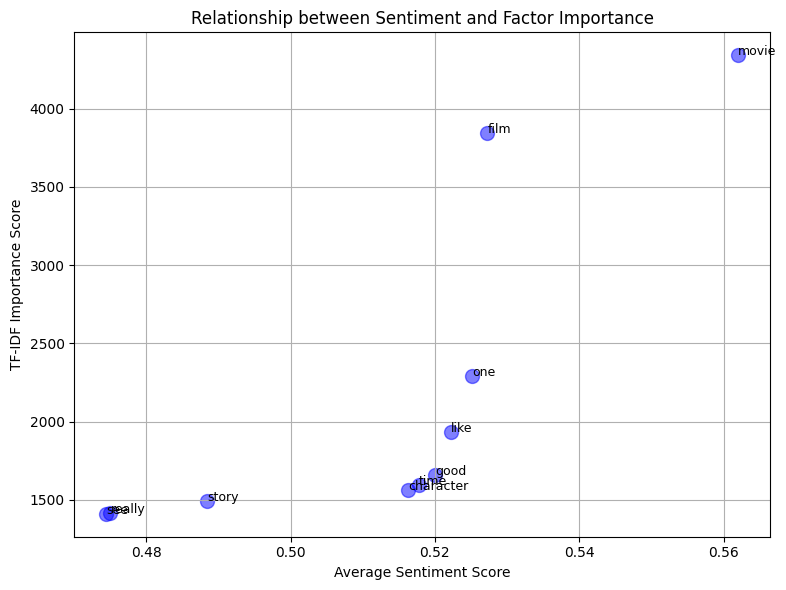

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the relationship between sentiment polarity and factor importance
plt.figure(figsize=(8, 6))
plt.scatter(importance_scores, [tfidf_scores[top_keyword_indices[idx]] for idx, _ in enumerate(importance_scores)],
            s=100, c='blue', alpha=0.5)
plt.xlabel('Average Sentiment Score')
plt.ylabel('TF-IDF Importance Score')
plt.title('Relationship between Sentiment and Factor Importance')

# Annotate the keywords
for i, txt in enumerate(top_keywords):
    plt.annotate(txt, (importance_scores[i], tfidf_scores[top_keyword_indices[i]]), fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()

Plotting the Importance of Keywords based on Sentiment Analysis.



sorted_keywords


<ipython-input-121-d2748b333ed8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_scores, y=keywords, palette='viridis')


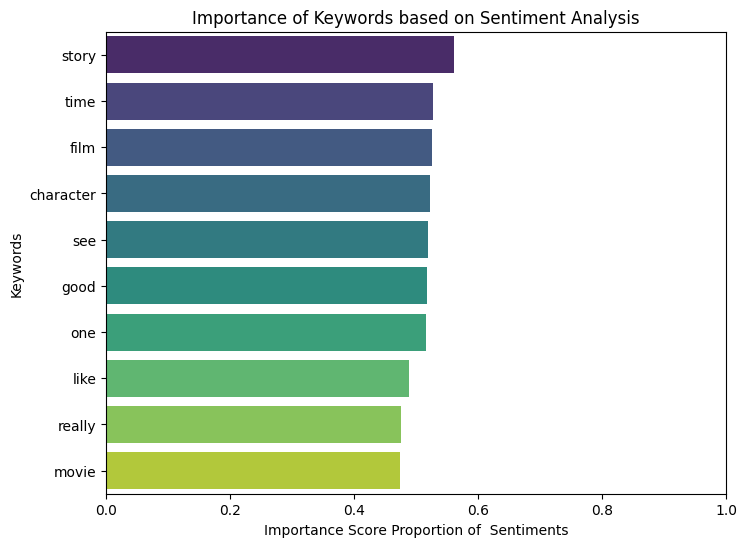

In [ ]:
# Sort keywords by importance score
sorted_keywords = sorted(keyword_importance.items(), key=lambda x: x[1], reverse=True)
print("sorted_keywords")
# Visualize importance scores
plt.figure(figsize=(8, 6))
keywords = [keyword for keyword, importance in sorted_keywords]
importance_scores = [importance for keyword, importance in sorted_keywords]
sns.barplot(x=importance_scores, y=keywords, palette='viridis')
plt.xlabel('Importance Score Proportion of  Sentiments')
plt.ylabel('Keywords')
plt.title('Importance of Keywords based on Sentiment Analysis')
plt.xlim(0, 1)
plt.show()

Plotting the Relationship between Sentiment and Factor Importance




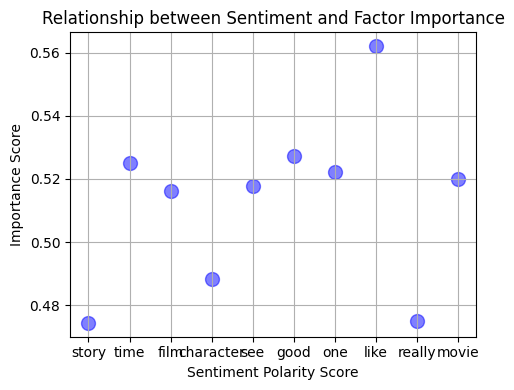

In [ ]:

plt.figure(figsize=(5,4))
plt.scatter(keywords,keyword_importance_score, s=100, c='blue', alpha=0.5)
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Importance Score')
plt.title('Relationship between Sentiment and Factor Importance')

plt.grid(True)
plt.tight_layout()
plt.show()


Plotting the Sentiment Distribution in Reviews

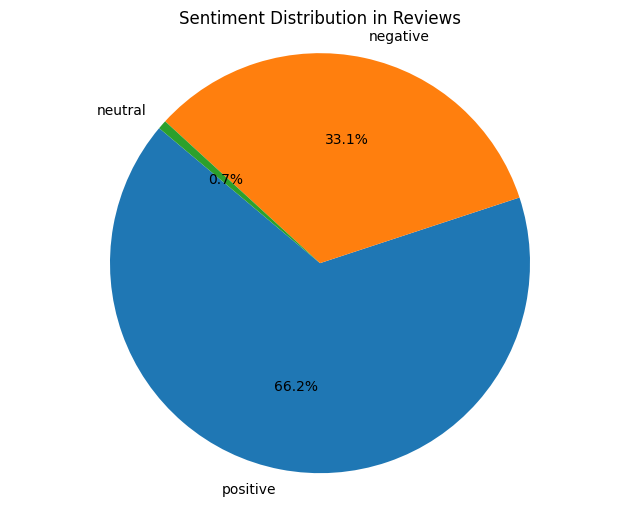

In [ ]:
sentiment_counts = df['predicted_sentiment'].value_counts()
sentiment_labels = sentiment_counts.index.to_list()
sentiment_values = sentiment_counts.to_list()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_values, labels=sentiment_labels, autopct="%1.1f%%", startangle=140)
plt.title('Sentiment Distribution in Reviews')
plt.axis('equal')
plt.show()

**Results:**

**Extract Key Factors:**

Phrases or keywords that are most frequently mentioned in customer feedback are,

Top Keywords:
1. movie
2. film
3. one
4. like
5. good
6. time
7. character
8. story
9. really
10. see

**Analyze Sentiment:**
By comparing  lexicon-based methods, for  load sentiment lexicons and compute sentiment scores and Used  machine learning approaches SVM Support vector Machine for spliting  into training and test sets, train the model, and evaluate its performance.

Report for the SVM:

Accuracy: 0.86

Confusion Matrix:

 [[4186  775]

 [ 631 4408]]

Classification  Report :                precision    recall  f1-score   support

    negative       0.87      0.84      0.86      4961
    positive       0.85      0.87      0.86      5039

    accuracy                           0.86     10000

    macro avg       0.86      0.86      0.86     10000

    weighted avg       0.86      0.86      0.86     10000

Report for VADER:

Sentiment Analysis using VADER:

Sentiment: Negative

Compound Score: -0.9929

Accuracy of VADER sentiment analysis: 0.69


Calculate Importance:

Importance Score of the top keyword:

{'movie': 0.47443794271635353, 'film': 0.5251822398939695, 'one': 0.516301512780386, 'like': 0.48842592592592593, 'good': 0.5178075271533216, 'time': 0.5272808586762076, 'character': 0.5222779580997344, 'story': 0.5620253164556962, 'really': 0.47505781301618766, 'see': 0.5200469719845664}



Actionable Insights:

1. Keyword: good, Importance Score: 0.74
2. Keyword: story, Importance Score: 0.72
3. Keyword: character, Importance Score: 0.71
4. Keyword: like, Importance Score: 0.70
5. Keyword: time, Importance Score: 0.70
6. Keyword: see, Importance Score: 0.70
7. Keyword: film, Importance Score: 0.69
8. Keyword: one, Importance Score: 0.69
9. Keyword: really, Importance Score: 0.68
10. Keyword: movie, Importance Score: 0.68


